** This is an example of using Python to visualize geological data. A free reflection seismology survey dataset is used. To learn about reflection seismology, information can be find at https://en.wikipedia.org/wiki/Reflection_seismology. An open-source Seg-Y loading module SEGYPY by Thomas Mejer Hansen and Andrew Squelch was used. The pre-processing and visualization part was written by me. A bug in the SEGYPY module was fixed by me as well. The Seg-Y file is the Teapot Dome 3D seismic survey downloaded from http://wiki.seg.org/wiki/Open_data#3D_land_seismic_data. This is a migrated stack in time. The seismic data was extracted from the original Seg-Y file and save to txt file. 50 inlines was extracted and converted into text file.**

** Matplotlib is the only plotting tool used in the demo. There are other more advanced packages to be tested for better plots. **

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
#import segy
%matplotlib inline

In [2]:
### This is the code to load SegY and save to text file
# headers = segy.getSegyHeader('teapot_dome_3d_mig.sgy')

# inline = segy.getSegyTraceHeader(headers,'cdpX')
# xline = segy.getSegyTraceHeader(headers,'cdpY')
# cdp = segy.getSegyTraceHeader(headers,'cdp')

# il_start = 75
# il_end = 125
# xl_start = xline.min()
# xl_end = xline.max()

# cdp_start = (il_start-1)*xline.max() + xl_start
# cdp_end = (il_end-1)*xline.max() + xl_end         
# indx_start = int(cdp_start-1)
# indx_end = int(cdp_end-1)            
          
# traces = []
# for itr in range(indx_start,indx_end+1):
#     if itr%xline.max() == 0:
#         print(inline[itr])
#     traces.append(segy.getSegyTrace(headers,itr)[1][0][300:])

# traces = np.asarray(traces)
# np.savetxt('il75_125_traces.txt',traces)

In [3]:
from io import StringIO
import requests
import json

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_4ebd3346be1849a8a6f31ec9c1a29cab(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_8d11baeb61e015a4f6868655eb4b4ca651ee224e','domain': {'id': '5b43e46e4b7b4988836464bb6cc026c5'},
            'password': 'R4qSN4sdp!0if*kR'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_4ebd3346be1849a8a6f31ec9c1a29cab('DefaultProjecthongsangcalgarygmailcom', 'il75_125_traces_2.txt')

In [4]:
xtraces = np.loadtxt(data_1)
traces = np.zeros((len(xtraces),1000)) 
for i in range(0,len(xtraces)):
    traces[i] = xtraces[i][0:1000]

In [5]:
### Extract time slices (z direction slices) 
z = np.arange(0,1000,1)
x = np.arange(0,51,1)
y = np.arange(0,51,1)
nxline = 51

X, Y = np.meshgrid(x, y)
tdepths = np.arange(100,900,100)
tslices = np.zeros((len(tdepths),len(y),len(x)))

for k in range(0,len(tdepths)):
    for i in range(0,len(y)):
        for j in range(0,len(x)):
            tslices[k][i][j] = traces[i*nxline+j][tdepths[k]]

** Plot time slices (z direction slices) ** 

** Due to the difference in the plotting tools, the color scales are slightly different for the 3D and 2D slice plots.**

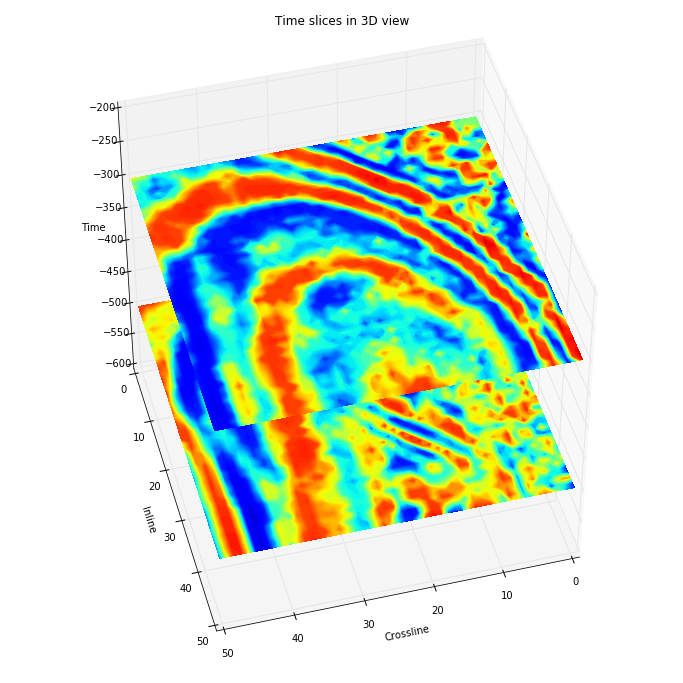

In [6]:
%matplotlib inline

levels = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x,y)

fig4 = plt.figure(figsize=(12,12))
ax4 = fig4.gca(projection='3d')
ax4.view_init(elev=45,azim=75)

ax4.contourf(X, Y, -300+tslices[2]*0.0075,  zdir='z', levels=-300+0.1*levels)
ax4.contourf(X, Y, -500+tslices[4]*0.0075,  zdir='z', levels=-500+0.1*levels)
ax4.set_zlim3d([-600,-200])
ax4.set_xlabel('Crossline')
ax4.set_ylabel('Inline')
ax4.set_zlabel('Time')
ax4.set_title('Time slices in 3D view',y=1.05)
#plt.axis('off')
plt.show()

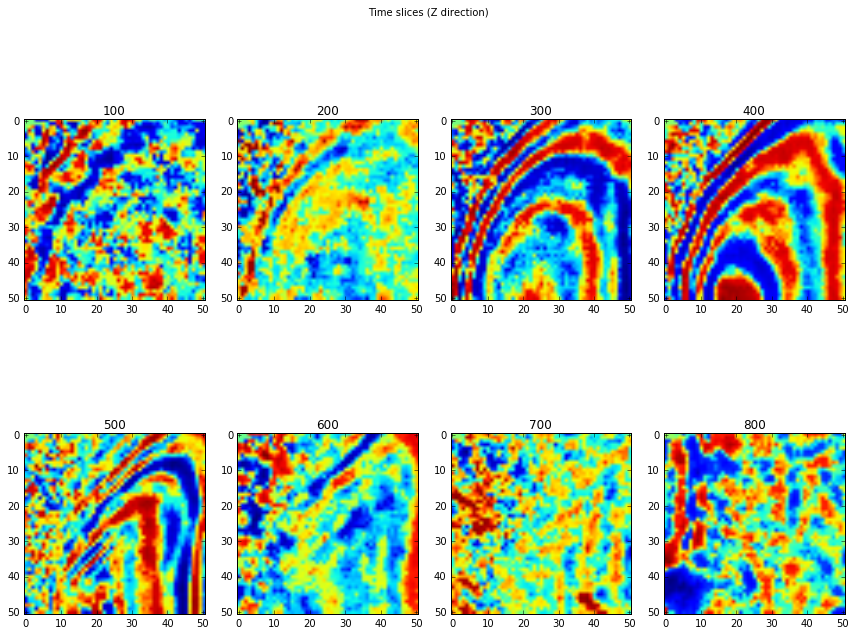

In [7]:
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
for i in range(0,len(tdepths)):
    plt.subplot(2,4,i+1)
    plt.imshow(tslices[i])
    plt.title(tdepths[i])
fig.suptitle('Time slices (Z direction)',y=1.00)
plt.tight_layout()

In [8]:
### Extract inline slices (y direction slices)
ils = np.arange(5,45,5)
ilslices = np.zeros((len(ils),nxline,len(traces[100])))
for i in range(0,len(ils)):
    for j in range(0,nxline):
        ilslices[i][j] = traces[ils[i]*nxline+j]

** Plot inline slices (y direction slices) **

** Due to the difference in the plotting tools, the color scales are slightly different for the 3D and 2D slice plots.**

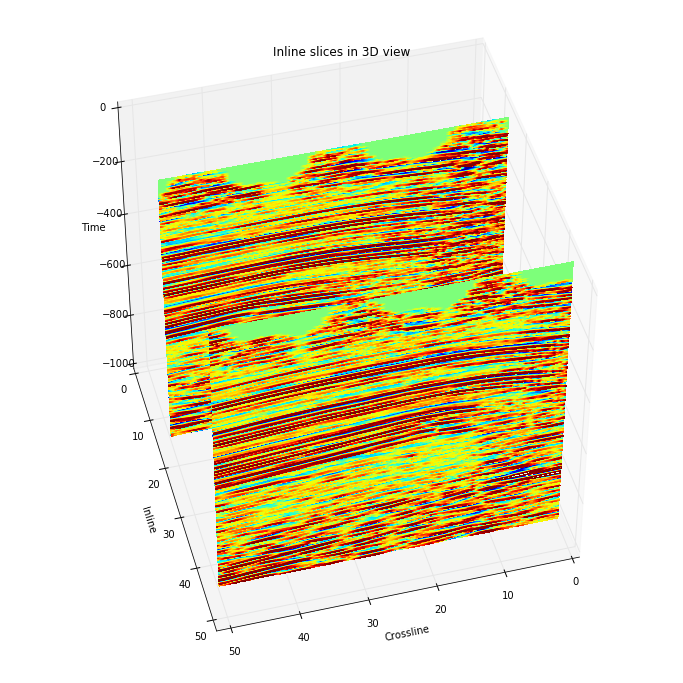

In [9]:
%matplotlib inline

Z,X = np.meshgrid(z,x)

fig5 = plt.figure(figsize=(12,12))
ax5 = fig5.gca(projection='3d')
ax5.view_init(elev=45,azim=75)

levels = np.linspace(-1, 1, 100)

ax5.contourf(X, 15+ilslices[2]*0.01, -1*Z, zdir='y', levels=15+0.1*levels, zorder=5)
ax5.contourf(X, 45+ilslices[7]*0.01, -1*Z, zdir='y', levels=45+0.1*levels, zorder=1)
ax5.set_xlim3d([0,51])
ax5.set_ylim3d([0,51])
ax5.set_zlim3d([-1000,0])
ax5.set_xlabel('Crossline')
ax5.set_ylabel('Inline')
ax5.set_zlabel('Time')
ax5.set_title('Inline slices in 3D view')
#plt.axis('off')
plt.show()

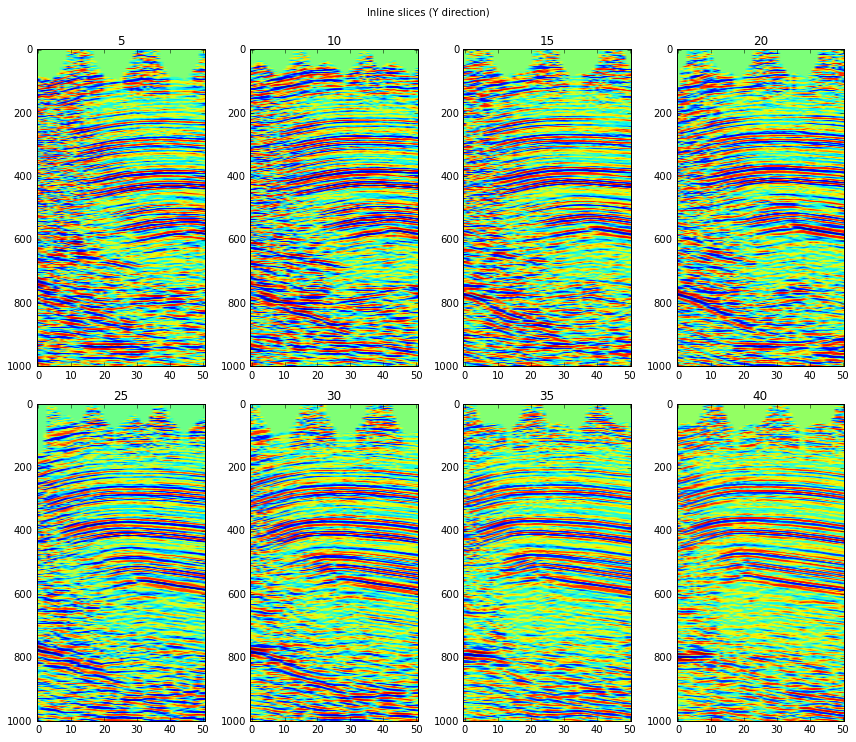

In [10]:
%matplotlib inline

fig2, ax2 = plt.subplots()
fig2.set_size_inches(12, 10)
for i in range(0,len(ils)):
    plt.subplot(2,4,i+1)
    plt.imshow(ilslices[i].transpose(),aspect='auto')
    plt.title(ils[i])
fig2.suptitle('Inline slices (Y direction)',y=1.025)
plt.tight_layout()

In [11]:
### Extract crossline slices (x direction slices)
xls = np.arange(5,45,5)
xlslices = np.zeros((len(xls),51,len(traces[100])))
for i in range(0,len(xls)):
    for j in range(0,51):
        xlslices[i][j] = traces[(xls[i]+nxline*j-1)] 

** Plot crossline slices (x direction slices) **

** Due to the difference in the plotting tools, the color scales are slightly different for the 3D and 2D slice plots.**

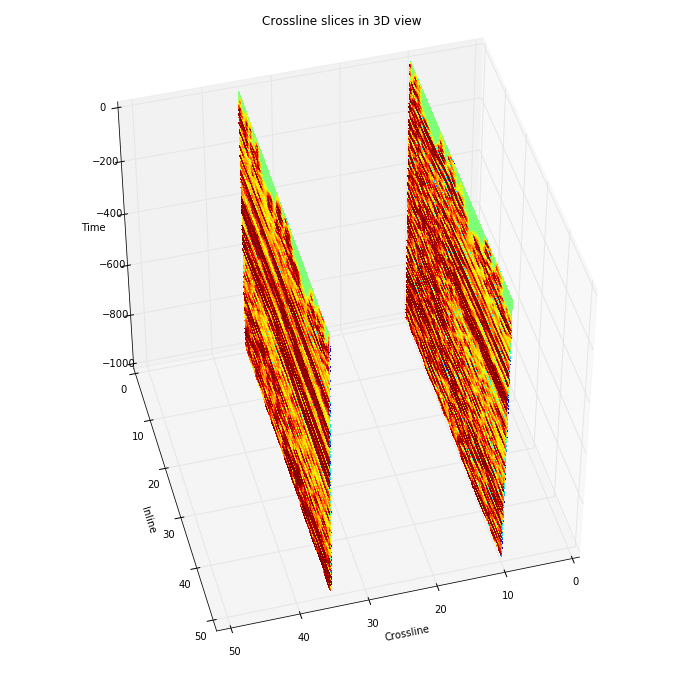

In [12]:
%matplotlib inline

Z, Y = np.meshgrid(z,y)

fig6 = plt.figure(figsize=(12,12))
ax6 = fig6.gca(projection='3d')
ax6.view_init(elev=45,azim=75)

levels = np.linspace(-1, 1, 100)
ax6.contourf(10+xlslices[1]*0.01, Y, -1*Z, zdir='x', levels=10+0.1*levels)
ax6.contourf(35+xlslices[6]*0.01, Y, -1*Z, zdir='x', levels=35+0.1*levels)
ax6.set_xlim3d([0,51])
ax6.set_ylim3d([0,51])
ax6.set_zlim3d([-1000,0])
ax6.set_xlabel('Crossline')
ax6.set_ylabel('Inline')
ax6.set_zlabel('Time')
ax6.set_title('Crossline slices in 3D view',y=1.05)
#plt.axis('off')
plt.show()

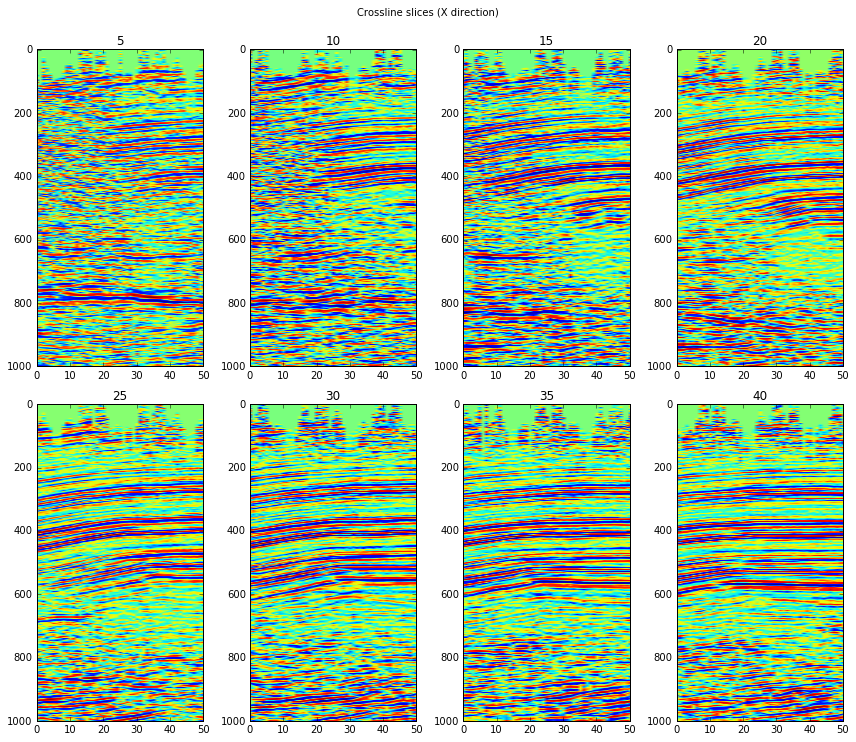

In [13]:
%matplotlib inline

fig3, ax3 = plt.subplots()
fig3.set_size_inches(12, 10)
for i in range(0,len(xls)):
    plt.subplot(2,4,i+1)
    plt.imshow(xlslices[i].transpose(),aspect='auto')
    plt.xlim([0,50])
    plt.title(xls[i])
fig3.suptitle('Crossline slices (X direction)',y=1.025)
plt.tight_layout()


** Plot slices in all 3 directions **

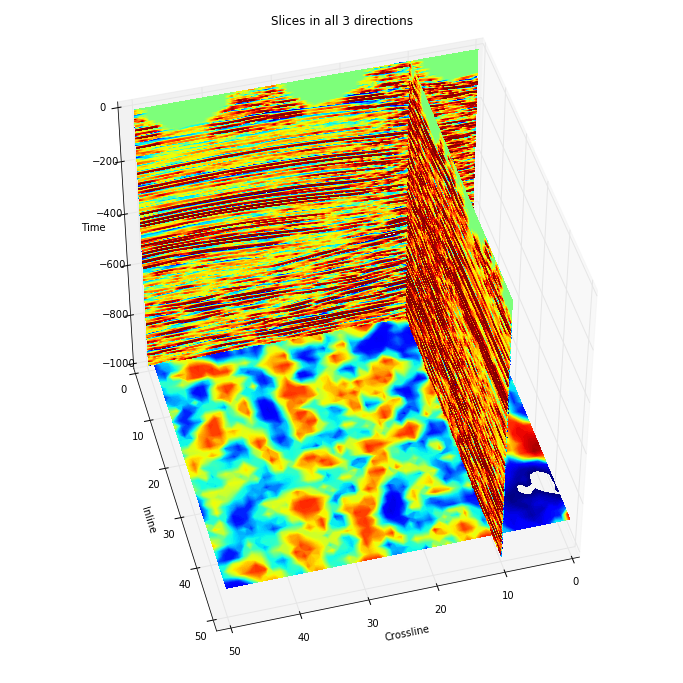

In [17]:
%matplotlib inline

fig7 = plt.figure(figsize=(12,12))
ax7 = fig7.gca(projection='3d')
ax7.view_init(elev=45,azim=75)

# Plot inline slice
Z,X = np.meshgrid(z,x)
ax7.contourf(X, ilslices[0]*0.01, -1*Z, zdir='y', levels=0.1*levels)

# Plot crossline slice
Z,Y = np.meshgrid(z,y)
ax7.contourf(10+xlslices[1]*0.01, Y, -1*Z, zdir='x', levels=10+0.1*levels)

# Plot time slice
X, Y = np.meshgrid(x,y)
ax7.contourf(X, Y, -900+tslices[7]*0.0075,  zdir='z', levels=-900+0.1*levels)

ax7.set_xlim3d([0,51])
ax7.set_ylim3d([0,51])
ax7.set_zlim3d([-1000,0])
ax7.set_xlabel('Crossline')
ax7.set_ylabel('Inline')
ax7.set_zlabel('Time')
ax7.set_title('Slices in all 3 directions',y=1.05)
plt.show()